In [128]:
# Importing necessary libraries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import re
from geopy.geocoders import Nominatim

# Set plotting font to Segoe UI (font used for the report)
plt.rcParams['font.family'] = 'Segoe UI'

# Load the dataset
df = pd.read_csv("MissingDataTreated.csv")
#print(df.info())      # Shows the size, columns, and data types for each variable

UNIVARIATE ANALYSIS

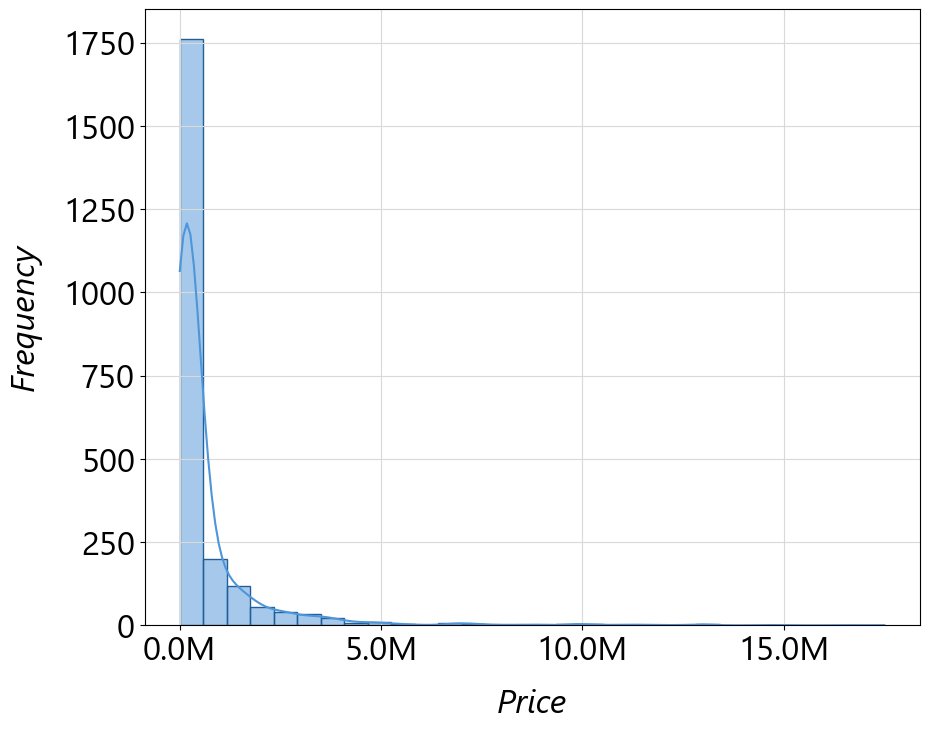

In [ ]:
# PRICE

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 8)) 

# Create Histogram
ax = sns.histplot(df['Price'], bins=30, kde=True, color='#4E95D9', 
             line_kws={'color': '#002060'}, edgecolor='#215F9A')

# Labels
plt.xlabel('Price', fontsize=24, fontname='Segoe UI', style='italic', labelpad=15)
plt.ylabel('Frequency', fontsize=24, fontname='Segoe UI', style='italic', labelpad=15)
plt.tick_params(axis='both', labelsize=24)

# X-axis in millions
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.xaxis.get_offset_text().set_fontsize(24)

# Grid
plt.grid(True, color='#D9D9D9')

# Show graphics
plt.show()


In [1]:
# YEAR

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 8)) 

# Create Histogram
ax = sns.histplot(df['Year'], bins=30, kde=True, color='#4E95D9', 
             line_kws={'color': '#002060'}, edgecolor='#215F9A')

# Labels
plt.xlabel('Year', fontsize=20, fontname='Segoe UI', style='italic', labelpad=15)
plt.ylabel('Frequency', fontsize=20, fontname='Segoe UI', style='italic', labelpad=15)
plt.tick_params(axis='both', labelsize=20)


# Grid
plt.grid(True, color='#D9D9D9')

# Show graphics
plt.show()

c:\Users\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


NameError: name 'df' is not defined

<Figure size 1000x800 with 0 Axes>

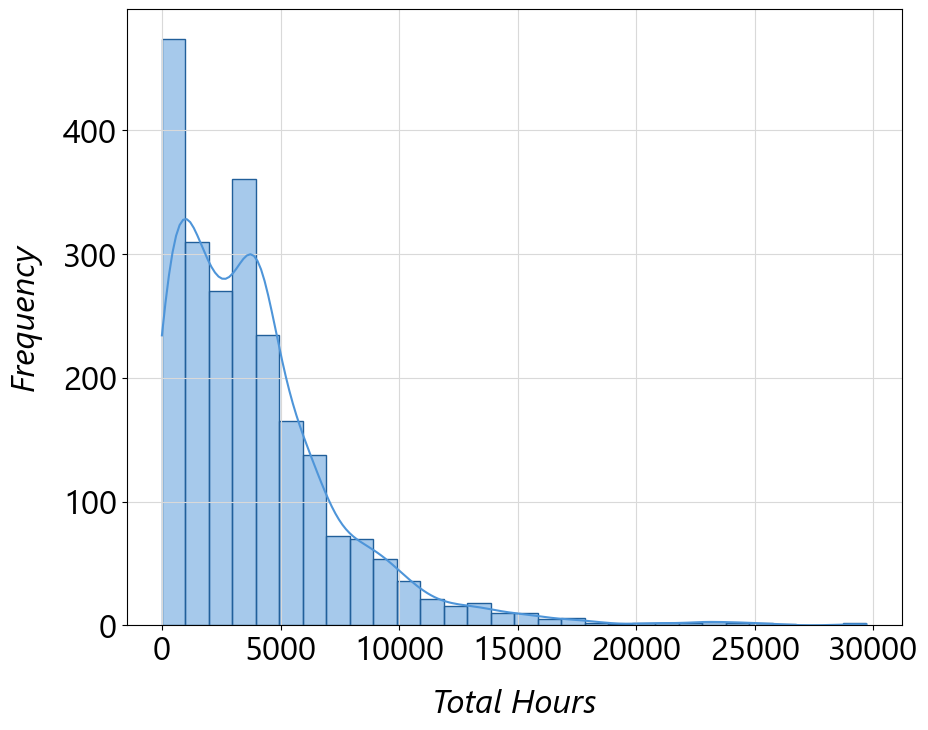

In [ ]:
# TOTAL HOURS

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 8)) 

# Create Histogram
ax = sns.histplot(df['Total Hours'], bins=30, kde=True, color='#4E95D9', 
             line_kws={'color': '#002060'}, edgecolor='#215F9A')

# Labels
plt.xlabel('Total Hours', fontsize=24, fontname='Segoe UI', style='italic', labelpad=15)
plt.ylabel('Frequency', fontsize=24, fontname='Segoe UI', style='italic', labelpad=15)
plt.tick_params(axis='both', labelsize=24)


# Grid
plt.grid(True, color='#D9D9D9')

# Show graphic
plt.show()

In [ ]:
# ESTADISTICAL METRICS FOR NUMERIC FEATURES

import pandas as pd
from scipy.stats import skew, kurtosis


# Compute statistic metrics
def calculate_statistics(df):
    stats = df.describe().T  #
    stats['Skewness'] = df.apply(lambda x: skew(x.dropna()), axis=0)  # Add skewness
    stats['Kurtosis'] = df.apply(lambda x: kurtosis(x.dropna()), axis=0)  # Add Kurtosis
    return stats

statistics_df = calculate_statistics(df_numeric)
print(statistics_df)

median_price = df['Price'].median()
median_totalhours = df['Total Hours'].median()

print(median_price)
print(median_totalhours)

In [ ]:
# PIE CHAR FOR TOTAL SEATS

import plotly.express as px
import pandas as pd

# Count categories in 'Total Seats'
value_counts = df['Total Seats'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Total Seats', 'Count']

df_main = value_counts_df[value_counts_df['Total Seats'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Total Seats'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Total Seats', 
    values='Count', 
    title='Total Seats',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=0,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Total Seats',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.3,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50} 
)

fig.show()



In [ ]:
# PIE CHAR FOR CONDITION

import plotly.express as px
import pandas as pd

# Count categories in 'Condition'
value_counts = df['Condition'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Condition', 'Count']

df_main = value_counts_df[value_counts_df['Condition'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Condition'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Condition', 
    values='Count', 
    title='Condition',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=0,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Condition',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.35,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()


In [ ]:
# PIE CHAR FOR CURRENCY

import plotly.express as px
import pandas as pd

# Count categories in 'Currency'
value_counts = df['Currency'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# COrder them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Currency', 'Count']

df_main = value_counts_df[value_counts_df['Currency'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Currency'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Currency', 
    values='Count', 
    title='Currency',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Currency',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.3,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()


In [ ]:
# PIE CHAR FOR FLIGHT RULES

import plotly.express as px
import pandas as pd

# Count categories in 'Flight Rules'
value_counts = df['Flight Rules'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# COrder them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Flight Rules', 'Count']

df_main = value_counts_df[value_counts_df['Flight Rules'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Flight Rules'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Flight Rules', 
    values='Count', 
    title='Flight Rules',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=0,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Flight Rules',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.4,  # Select the y position
        xanchor="center", x=1.3,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()


In [ ]:
# PIE CHART FOR CATEGORY

import plotly.express as px
import pandas as pd

# Count categories in 'Category'
value_counts = df['Category'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# COrder them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Category', 'Count']

df_main = value_counts_df[value_counts_df['Category'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Category'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Category', 
    values='Count', 
    title='Category',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Category',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.5,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR PROPULSION

import plotly.express as px
import pandas as pd

# Count categories in 'Propulsion'
value_counts = df['Propulsion'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Propulsion', 'Count']

df_main = value_counts_df[value_counts_df['Propulsion'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Propulsion'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Propulsion', 
    values='Count', 
    title='Propulsion',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Propulsion',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.3,  # Select the y position
        xanchor="center", x=1.3,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR NO. ENGINES

import plotly.express as px
import pandas as pd

# Count categories in 'No. Engines'
value_counts = df['No. Engines'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['No. Engines', 'Count']

df_main = value_counts_df[value_counts_df['No. Engines'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['No. Engines'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='No. Engines', 
    values='Count', 
    title='No. Engines',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='No. Engines',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.4,  # Select the y position
        xanchor="center", x=1.3,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR MODEL

import plotly.express as px
import pandas as pd

# Count categories in 'Model'
value_counts = df['Model'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Model', 'Count']

df_main = value_counts_df[value_counts_df['Model'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Model'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Model', 
    values='Count', 
    title='Model',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Model',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.2,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR MAKE

import plotly.express as px
import pandas as pd

# Count categories in 'Make'
value_counts = df['Make'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Make', 'Count']

df_main = value_counts_df[value_counts_df['Make'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Make'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Make', 
    values='Count', 
    title='Make',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Make',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.2,  # Select the y position
        xanchor="center", x=1.45,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR MAINT. ENG. 1

import plotly.express as px
import pandas as pd

# Change NaN by No Information
df['Maint. Eng. 1'] = df['Maint. Eng. 1'].fillna('No Information')
df['Maint. Eng. 1'] = df['Maint. Eng. 1'].replace('0', 'Not Applicable')

# Count categories in 'Maint. Eng. 1'
value_counts = df['Maint. Eng. 1'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Maint. Eng. 1', 'Count']

df_main = value_counts_df[value_counts_df['Maint. Eng. 1'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Maint. Eng. 1'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Maint. Eng. 1', 
    values='Count', 
    title='Maint. Eng. 1',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=90,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Maint. Eng. 1',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()


In [ ]:
# PIE CHART FOR MAINT. ENG. 2

import plotly.express as px
import pandas as pd

# Change NaN by No Information
df['Maint. Eng. 2'] = df['Maint. Eng. 2'].replace('0', 'Not Applicable')

# Count categories in 'Maint. Eng. 2'
value_counts = df['Maint. Eng. 2'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Maint. Eng. 2', 'Count']

df_main = value_counts_df[value_counts_df['Maint. Eng. 2'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Maint. Eng. 2'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Maint. Eng. 2', 
    values='Count', 
    title='Maint. Eng. 2',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=0,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Maint. Eng. 2',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()


In [ ]:
# PIE CHART FOR MAINT. PROP. 1

import plotly.express as px
import pandas as pd

# Change NaN by No Information
df['Maint. Prop. 1'] = df['Maint. Prop. 1'].fillna('No Information')
df['Maint. Prop. 1'] = df['Maint. Prop. 1'].replace('0', 'Not Applicable')

# Count categories in 'Maint. Prop. 1'
value_counts = df['Maint. Prop. 1'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Maint. Prop. 1', 'Count']

df_main = value_counts_df[value_counts_df['Maint. Prop. 1'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Maint. Prop. 1'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Maint. Prop. 1', 
    values='Count', 
    title='Maint. Prop. 1',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=0,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Maint. Prop. 1',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# PIE CHART FOR MAINT. PROP. 2

import plotly.express as px
import pandas as pd

# Change NaN by No Information
df['Maint. Prop. 2'] = df['Maint. Prop. 2'].fillna('No Information')
df['Maint. Prop. 2'] = df['Maint. Prop. 2'].replace('0', 'Not Applicable')

# Count categories in 'Maint. Prop. 2'
value_counts = df['Maint. Prop. 2'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Maint. Prop. 2', 'Count']

df_main = value_counts_df[value_counts_df['Maint. Prop. 2'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Maint. Prop. 2'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Maint. Prop. 2', 
    values='Count', 
    title='Maint. Prop. 2',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Maint. Prop. 2',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.25,  # Select the y position
        xanchor="center", x=1.4,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# YEAR

import plotly.express as px
import pandas as pd

# Count categories in 'Year'
value_counts = df['Year'].value_counts()

# Select 6 most frequent categories
top_values = value_counts.nlargest(6)

# Group the rest in "Others"
others_count = value_counts.iloc[6:].sum()
if others_count > 0:
    top_values['Others'] = others_count

# Order them from most frequent to least frequent (except Others)
value_counts_df = top_values.reset_index()
value_counts_df.columns = ['Year', 'Count']

df_main = value_counts_df[value_counts_df['Year'] != 'Others'].sort_values(by='Count', ascending=False)
df_others = value_counts_df[value_counts_df['Year'] == 'Others']

final_df = pd.concat([df_main, df_others])

# Define the colors for the pie chart
piece_colors = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']  # Piece colors
percentage_colors = ['#F2F2F2', '#F2F2F2', '#F2F2F2', '#002060', '#002060', '#002060', '#F2F2F2']  # Percentage colors

# Create chart
fig = px.pie(
    final_df, 
    names='Year', 
    values='Count', 
    title='Year',
    color_discrete_sequence=piece_colors[:len(final_df)]
)


# Rotate the graphic
fig.update_traces(
    rotation=270,  
    sort=False, 
    textinfo='percent',  # Show percentages inside pieces
    textfont=dict(family = 'Segoe UI', size=20, color=percentage_colors[:len(final_df)]),  # Adjust percentages' size and colors
    insidetextorientation='horizontal'  # Ensure percentages are shown horixontally
)

# Configure legend
fig.update_layout(
    title=dict(
        text='Year',
        font=dict(family = 'Segoe UI', size=24, color="#000000") 
    ),
    legend=dict(
        font=dict(family = 'Segoe UI', size=20, color="#000000"),
        orientation="v",  # Show legend vertically
        yanchor="bottom", y=0.2,  # Select the y position
        xanchor="center", x=1.45,  # Select the x position
        traceorder='normal'  # Ensure the order of the leyend
    ),
    width=700,  # Adjust the width of the chart
    height=500,  # Adjust the height of the chart
    title_x=0.5,  # Center the title horizontally
    title_y=0.85,  # Adjust the vertical position of the title

    margin={"l": 50, "r": 350, "t": 100, "b": 50}
)

fig.show()

In [ ]:
# DENSITY MAP FOR COUNTRY

import plotly.express as px

# Group by country and count entries for each of the countries
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'registros']
custom_blue_scale = ['#A6CAEC','#4E95D9','#215F9A','#002060']

# Create a density map 
fig = px.choropleth(
    country_counts,
    locations='Country', 
    locationmode='country names',  
    color='registros', 
    color_continuous_scale= custom_blue_scale, 
    title='Country'
)

fig.update_layout(
    geo=dict(
        showframe=False, 
        showcoastlines=False, 
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25, 
        xanchor="center", x=1.4, 
        font=dict(size=32, family="Segoe UI")
    ),
    
    coloraxis_colorbar=dict(
        title=dict(text='Density', font=dict(size=32, family="Segoe UI")),  
        tickfont=dict(size=32, family="Segoe UI")
    ),

        title=dict(
        text='<i>Country</i>', 
        x=0.5, 
        y=0.9, 
        font=dict(size=38, family="Segoe UI") 
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900, 
    height=600 
    
)
fig.show()

# Save the interactive map as an image
# fig.write_image("mapa_densidad.png", width=800, height=600, scale=1)

In [ ]:
# DESNSITY MAP FOR STATE

# Filter entries where State is different from NaN of N/A to know countries for which states are specified
filtered_df = df[df['State'].notna() & (df['State'] != 'N/A')]
# Compute the number of entries per Country
country_counts = filtered_df['Country'].value_counts()
# Order dataframe
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'conteo']
# Show result
#print(country_counts_df)



# Filter the entries where country is United States 
filtered_df = df[df['Country'].isin(['United States'])]
# Count the number of entries by State
state_counts = filtered_df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Registros']
# Create a density map by states
fig = px.choropleth(
    state_counts,
    locations='State', 
    locationmode='USA-states',
    color='Registros', 
    color_continuous_scale=custom_blue_scale, 
    title='States',
    scope='north america'
)

fig.update_layout(
    geo=dict(
        showframe=False, 
        showcoastlines=False, 
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25,
        xanchor="center", x=1.4,
        font=dict(size=32, family="Segoe UI")
    ),
    
    coloraxis_colorbar=dict(
        title=dict(text='Density', font=dict(size=32, family="Segoe UI")),
        tickfont=dict(size=32, family="Segoe UI")
    ),

        title=dict(
        text='<i>State</i>', 
        x=0.5, 
        y=0.9, 
        font=dict(size=38, family="Segoe UI")
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900,  
    height=600 
    
)

fig.show()

In [ ]:
# DENSITY MAP FOR NATIONAL ORIGIN

import plotly.express as px

# Group by country and count entries for each of the countries
country_counts = df['National Origin'].value_counts().reset_index()
country_counts.columns = ['National Origin', 'registros']
custom_blue_scale = ['#A6CAEC','#4E95D9','#215F9A','#002060']

# Create a density map 
fig = px.choropleth(
    country_counts,
    locations='National Origin',
    locationmode='country names', 
    color='registros',
    color_continuous_scale= custom_blue_scale,
    title='National Origin'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25,
        xanchor="center", x=1.4,
        font=dict(size=32, family="Segoe UI")
    ),
    
    coloraxis_colorbar=dict(
        title=dict(text='Density', font=dict(size=32, family="Segoe UI")),
        tickfont=dict(size=32, family="Segoe UI")
    ),

        title=dict(
        text='<i>National Origin</i>', 
        x=0.5,
        y=0.9,
        font=dict(size=38, family="Segoe UI")
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900,
    height=600
    
)

# Save the interactive map as an image
# fig.write_image("mapa_densidad.png", width=800, height=600, scale=1)

UNIVARIATE ANALYSIS

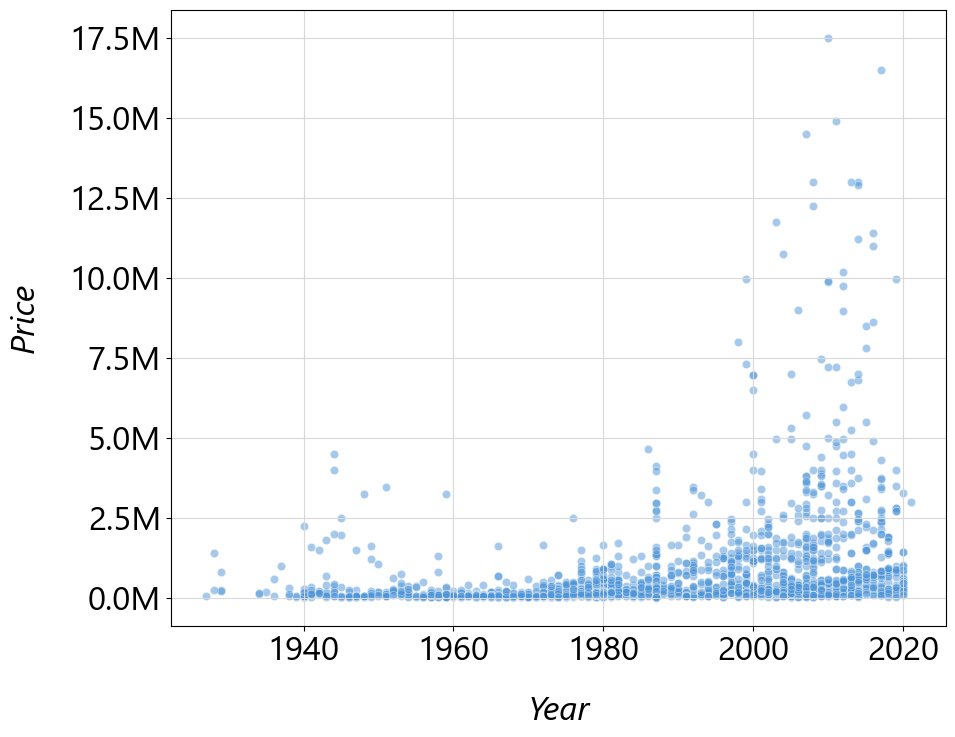

In [150]:
# YEAR

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=df['Year'], y=df['Price'], alpha=0.5, color='#4E95D9')


# Label on axis
plt.xlabel('Year', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=24, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)



plt.grid(True, color='#D9D9D9')
plt.show()

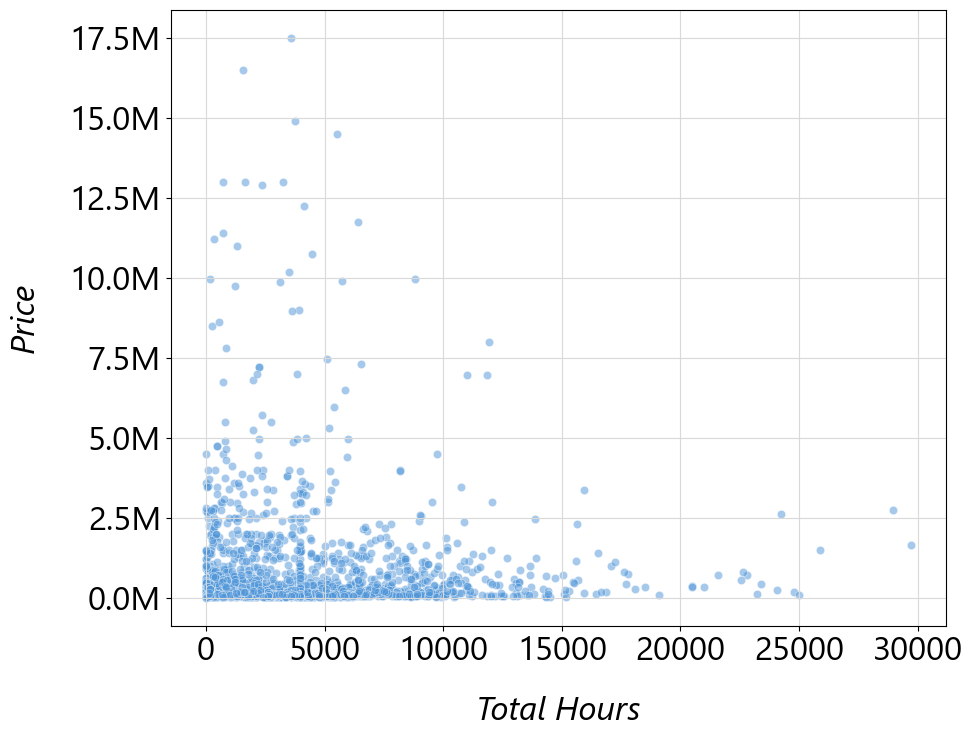

In [151]:
# TOTAL HOURS

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=df['Total Hours'], y=df['Price'], alpha=0.5, color='#4E95D9')


# Label on axis
plt.xlabel('Total Hours', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=24, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)



plt.grid(True, color='#D9D9D9')
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\1786377487.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\1786377487.py:24: UserWarning:

The palette list has more values (7) than needed (4), which may not be intended.



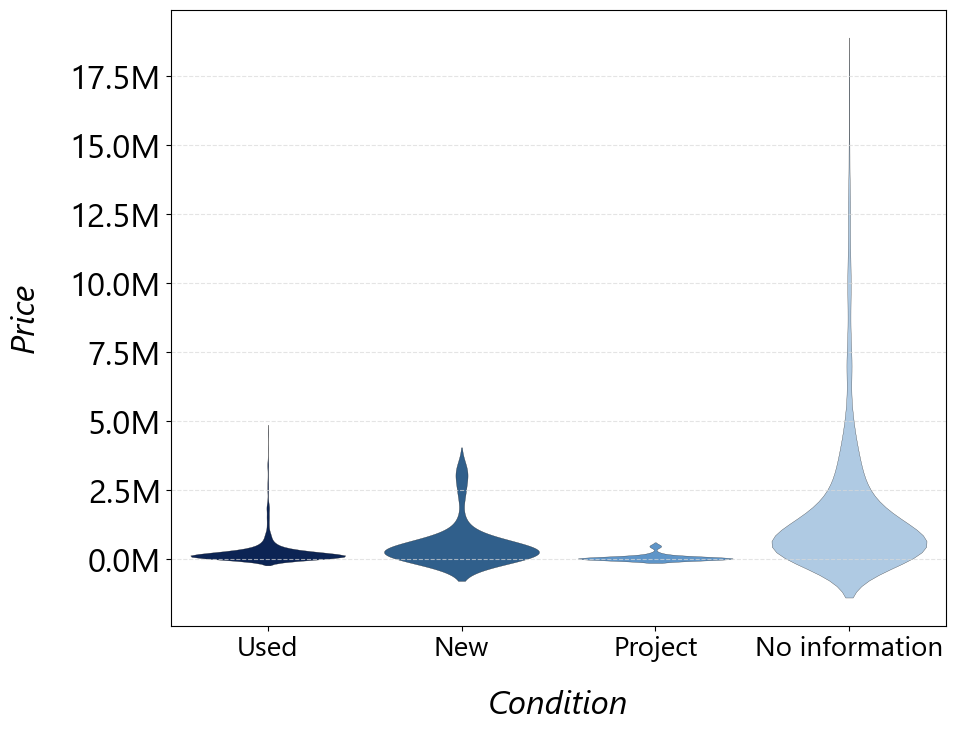

In [ ]:
# CONDITION

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Condition'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Condition_Modified'] = df['Condition'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Condition_Modified'].value_counts().index.tolist()
if "No information" in ordered_categories:
    ordered_categories.remove("No information")
    ordered_categories.append("No information")

# Create violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='Condition_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Condition', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\1388679521.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




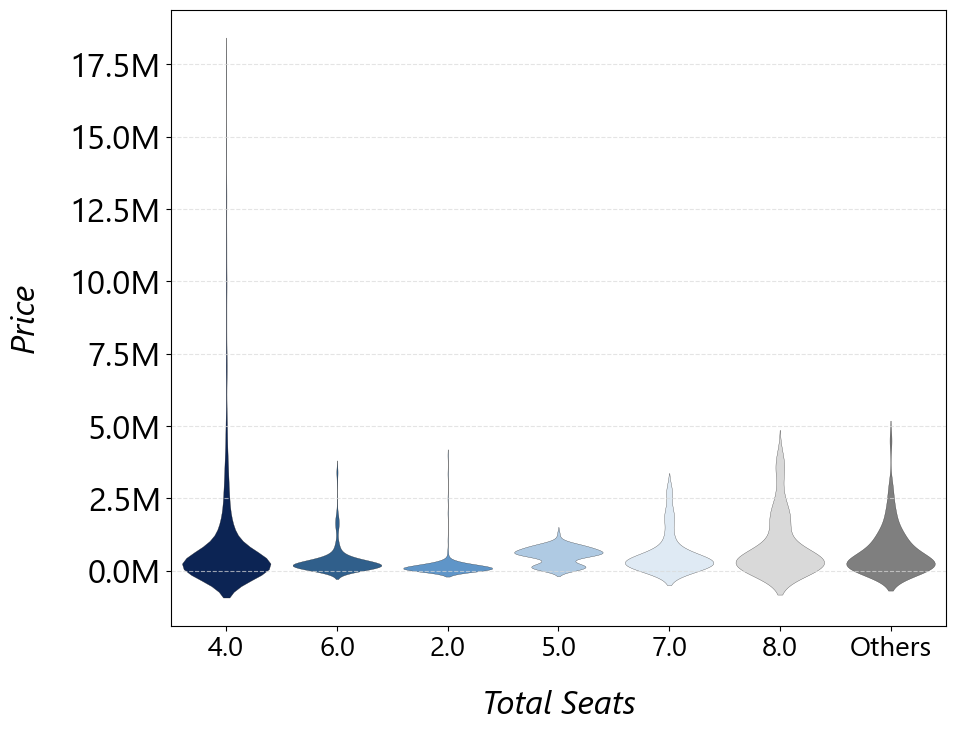

In [153]:
# TOTAL SEATS

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Total Seats'].value_counts().nlargest(6).index  

# Create new column "Others"
df['TotalSeats_Modified'] = df['Total Seats'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['TotalSeats_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# CCreate violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='TotalSeats_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Total Seats', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\2610952872.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\2610952872.py:24: UserWarning:

The palette list has more values (7) than needed (3), which may not be intended.



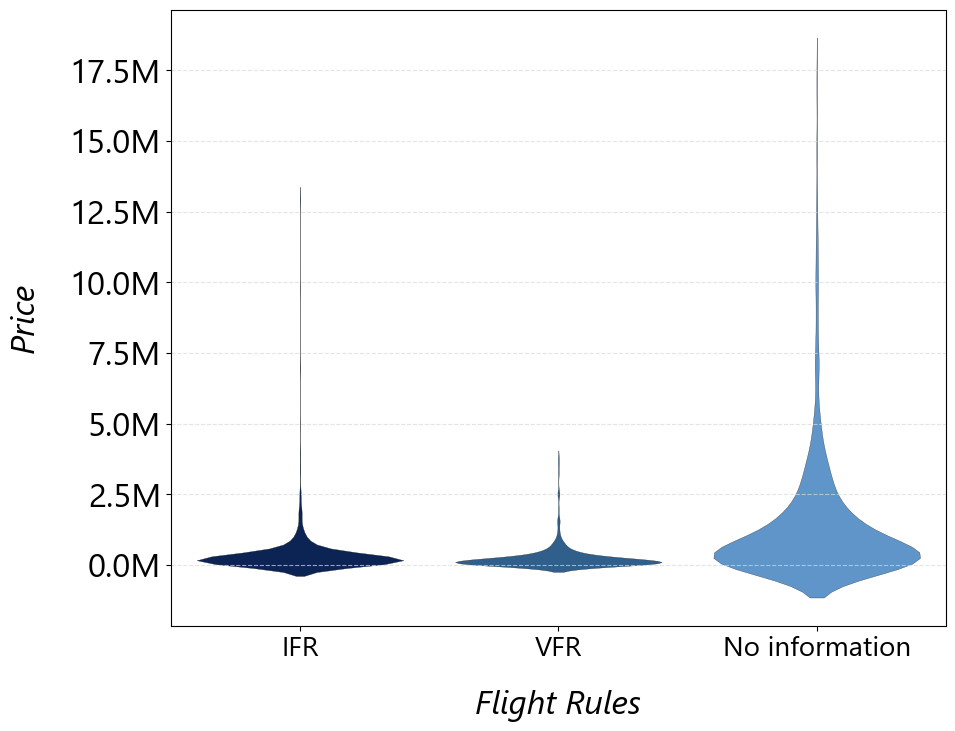

In [154]:
# FLIGHT RULES

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Flight Rules'].value_counts().nlargest(6).index  

# Create new column "Others"
df['FlightRules_Modified'] = df['Flight Rules'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['FlightRules_Modified'].value_counts().index.tolist()
if "No information" in ordered_categories:
    ordered_categories.remove("No information")
    ordered_categories.append("No information")

# CCreate violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='FlightRules_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Flight Rules', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\406227582.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\406227582.py:24: UserWarning:

The palette list has more values (7) than needed (5), which may not be intended.



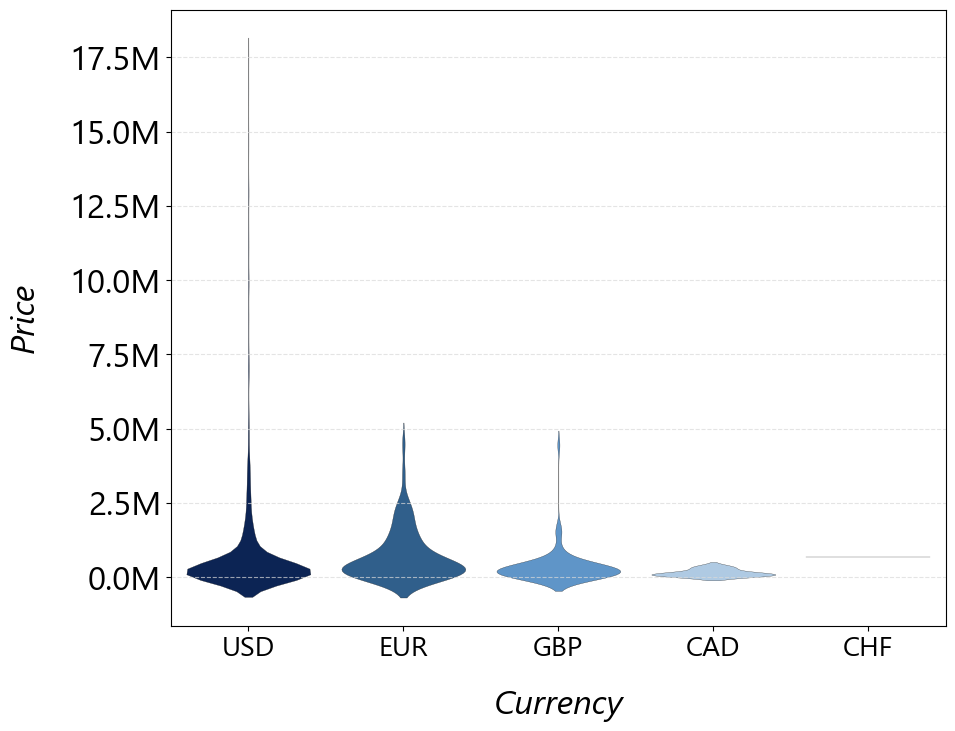

In [155]:
# CURRENCY

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Currency'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Currency_Modified'] = df['Currency'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Currency_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# CCreate violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='Currency_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Currency', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\4108155050.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\4108155050.py:24: UserWarning:

The palette list has more values (7) than needed (5), which may not be intended.



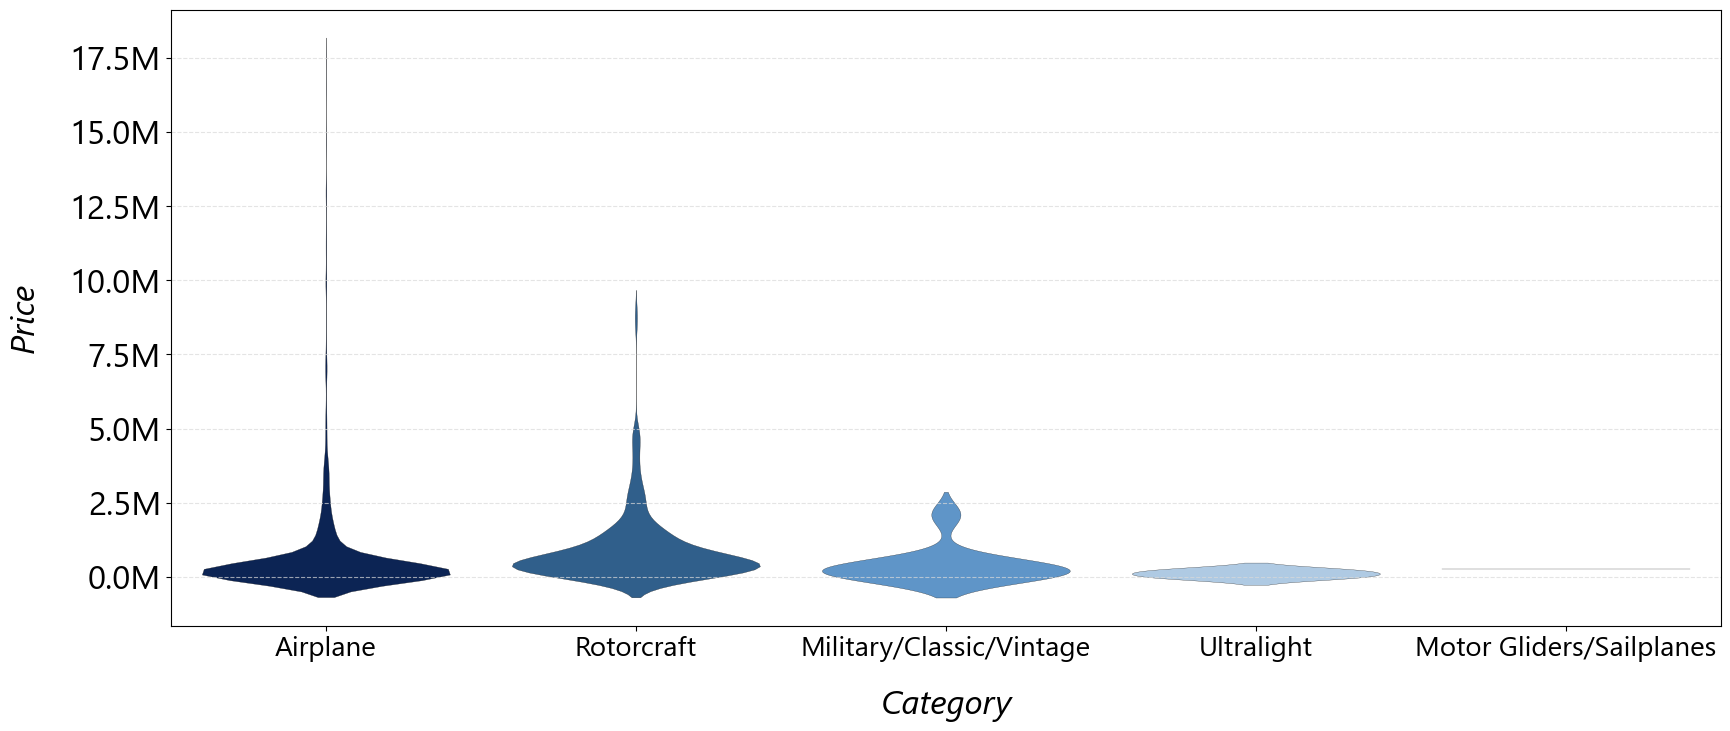

In [156]:
# CATEGORY

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Category'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Category_Modified'] = df['Category'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Category_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# Create violin plot
plt.figure(figsize=(20, 8))
ax = sns.violinplot(
    data=df, x='Category_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Category', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\3381731840.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\3381731840.py:24: UserWarning:

The palette list has more values (7) than needed (5), which may not be intended.



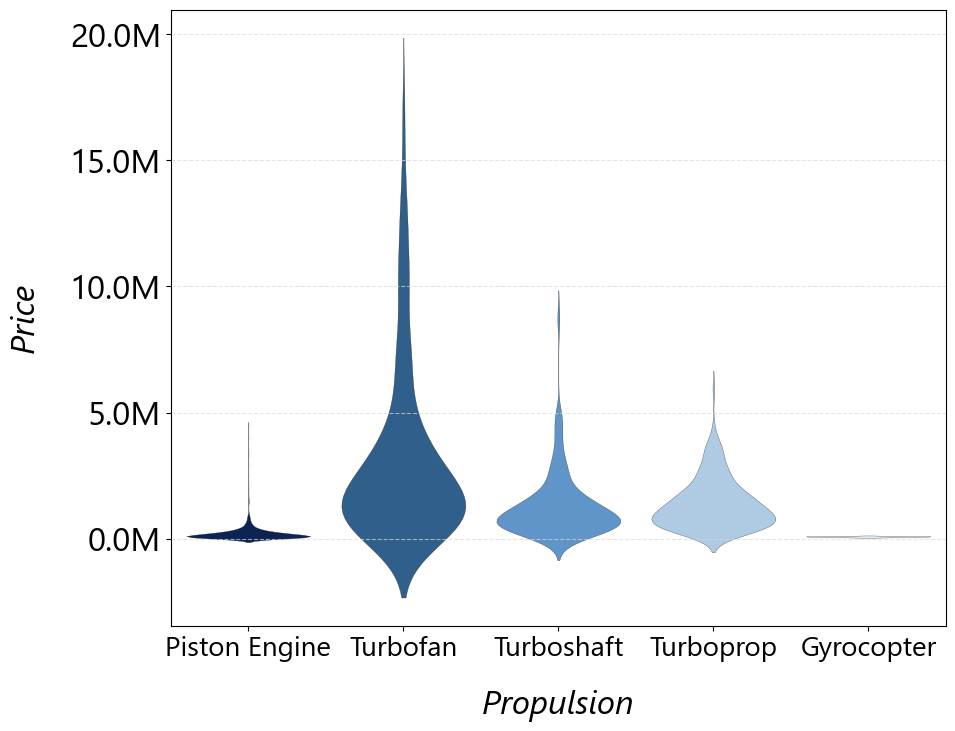

In [ ]:
# PROPULSION

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Propulsion'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Propulsion_Modified'] = df['Propulsion'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Propulsion_Modified'].value_counts().index.tolist()
if "No information" in ordered_categories:
    ordered_categories.remove("No information")
    ordered_categories.append("No information")

# Create violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='Propulsion_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Propulsion', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')
# Set Y-axis max to 17.5 million

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\609019779.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\609019779.py:24: UserWarning:

The palette list has more values (7) than needed (2), which may not be intended.



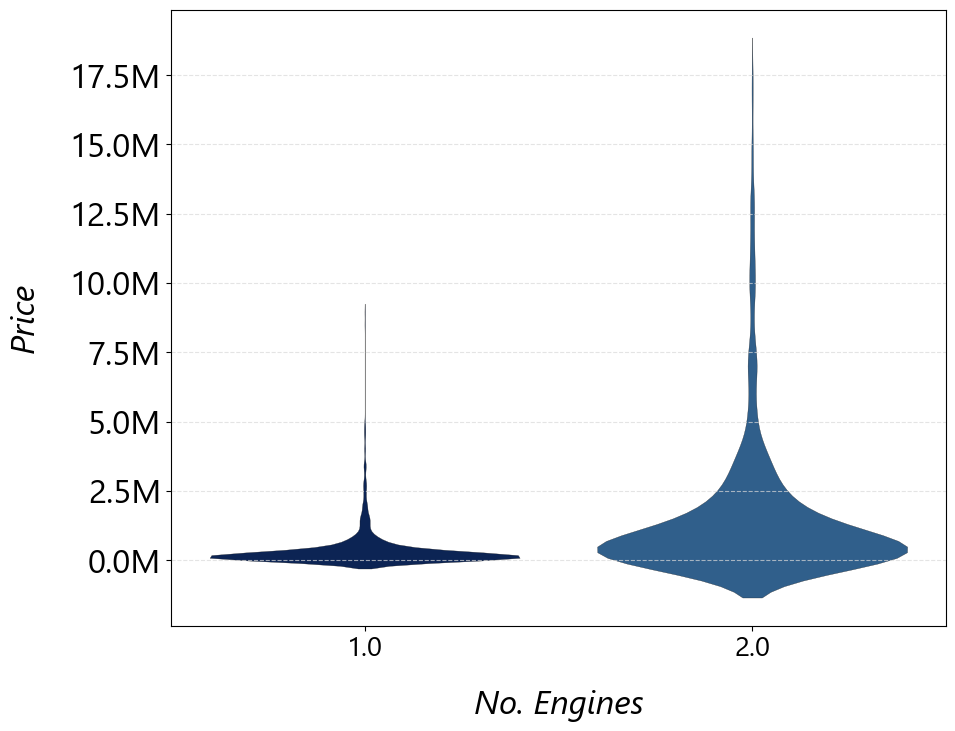

In [167]:
# NO. ENGINES

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['No. Engines'].value_counts().nlargest(6).index  

# Create new column "Others"
df['NoEngines_Modified'] = df['No. Engines'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['NoEngines_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# Create violin plot
plt.figure(figsize=(10, 8))
ax = sns.violinplot(
    data=df, x='NoEngines_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('No. Engines', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\2224072898.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




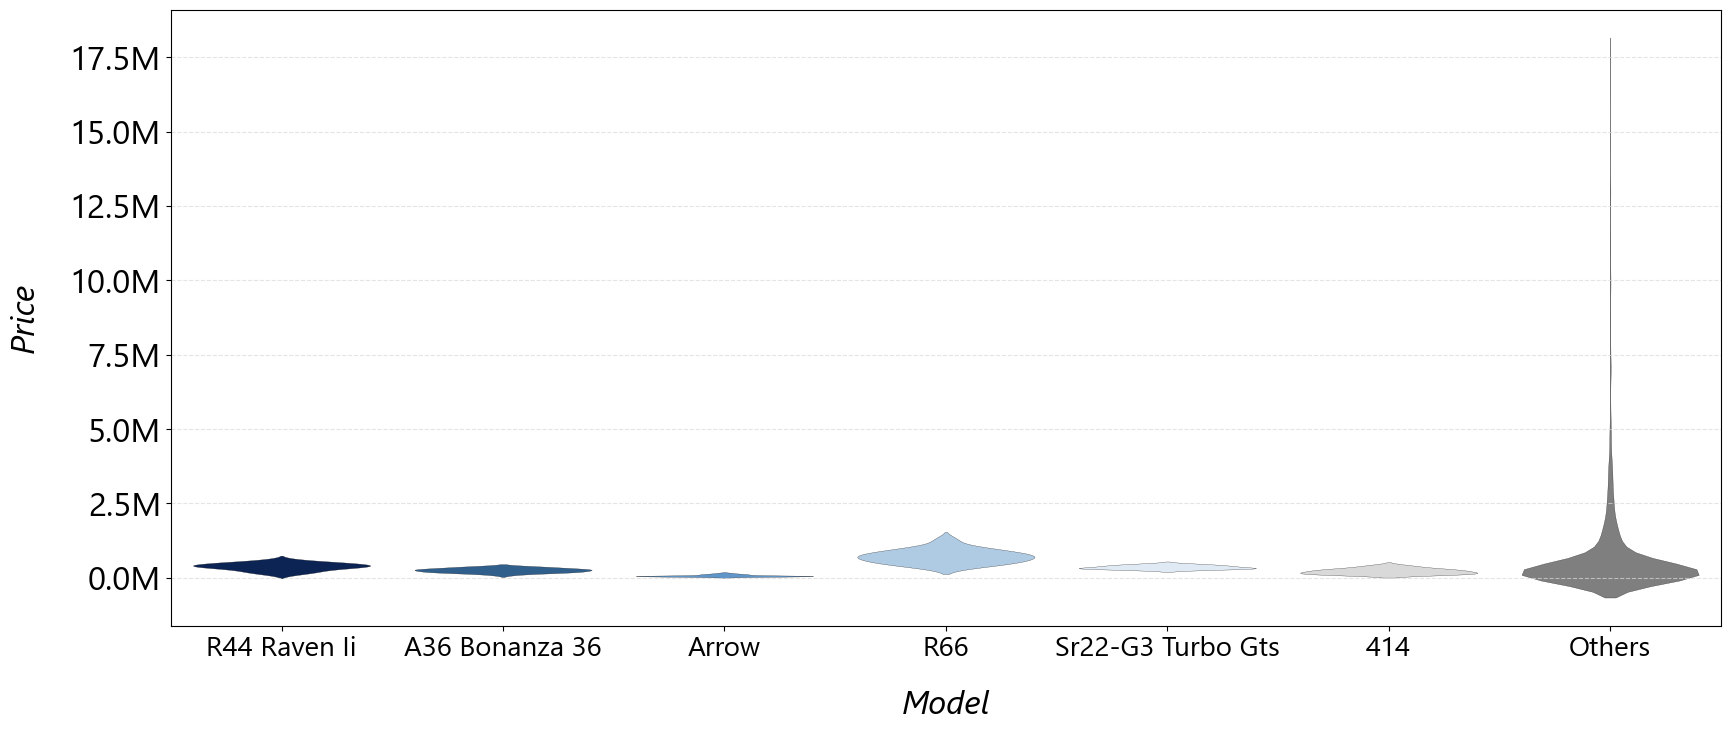

In [ ]:
# MODEL

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Model'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Model_Modified'] = df['Model'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Model_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# Create violin plot
plt.figure(figsize=(20, 8))
ax = sns.violinplot(
    data=df, x='Model_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Model', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()


C:\Users\Ángela Martín Milán\AppData\Local\Temp\ipykernel_11560\3993737927.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




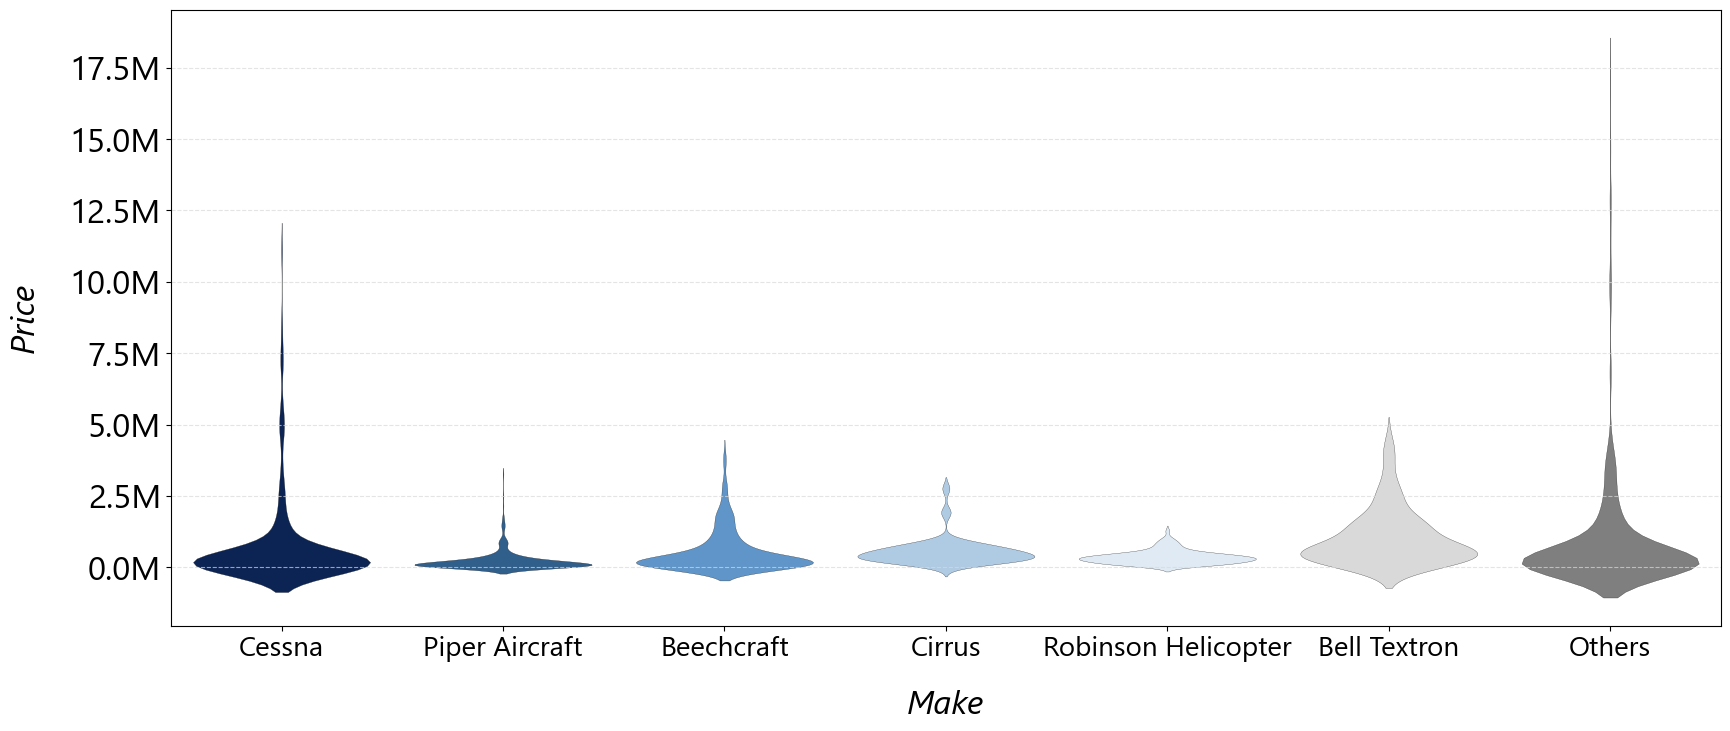

In [ ]:
# MAKE

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Palette colors
color_palette = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Select 6 most common categories
top_conditions = df['Make'].value_counts().nlargest(6).index  

# Create new column "Others"
df['Make_Modified'] = df['Make'].apply(lambda x: x if x in top_conditions else 'Others')

# Order categories "Others"
ordered_categories = df['Make_Modified'].value_counts().index.tolist()
if "Others" in ordered_categories:
    ordered_categories.remove("Others")
    ordered_categories.append("Others")

# Create violin plot
plt.figure(figsize=(20, 8))
ax = sns.violinplot(
    data=df, x='Make_Modified', y='Price', inner=None, 
    palette=color_palette, width=0.8, order=ordered_categories, linewidth=0.2
)

# Label on axis
plt.xlabel('Make', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
plt.ylabel('Price', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)

# Axis format
plt.xticks(fontsize=20, fontname='Segoe UI')
plt.yticks(fontsize=24, fontname='Segoe UI')

# FY-axis in millions
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.yaxis.get_offset_text().set_fontsize(24)

# Grid format
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#D9D9D9')

plt.xticks(rotation=0)
plt.show()

In [ ]:
# DENSITY MAP BASED ON MEDIAN PRICE PER COUNTRY

import plotly.express as px

# Group by country and calculate the median price
country_median_price = df.groupby('Country')['Price'].median().reset_index()

# Custom color scale
custom_red_scale = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Create a density map
fig = px.choropleth(
    country_median_price,
    locations='Country', 
    locationmode='country names', 
    color='Price',  
    color_continuous_scale=custom_red_scale, 
    title='Median Aircraft Price per Country'
)

fig.update_layout(
    geo=dict(
        showframe=False,  
        showcoastlines=False,
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25, 
        xanchor="center", x=1.4, 
        font=dict(size=32, family="Segoe UI")
    ),
    coloraxis_colorbar=dict(
        title=dict(text='Median Price', font=dict(size=32, family="Segoe UI")), 
        tickfont=dict(size=32, family="Segoe UI")
    ),
    title=dict(
        text='<i>Country</i>', 
        x=0.5,
        y=0.9,
        font=dict(size=38, family="Segoe UI")  
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900,  
    height=600  
)

fig.show()



In [ ]:
# DENSITY MAP BASED ON MEDIAN PRICE PER STATE

import plotly.express as px

# Filter records with 'State' different than NaN or 'N/A'
filtered_df = df[df['State'].notna() & (df['State'] != 'N/A')]

# Filter only by USA
us_df = filtered_df[filtered_df['Country'] == 'United States']

# Calculate the median of the price per State
state_median_price = us_df.groupby('State')['Price'].median().reset_index()

# Define scale colors
custom_red_scale = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Create density map
fig = px.choropleth(
    state_median_price,
    locations='State', 
    locationmode='USA-states', 
    color='Price',
    color_continuous_scale=custom_red_scale, 
    title='Median Aircraft Price per State',
    scope='north america' 
)

fig.update_layout(
    geo=dict(
        showframe=False, 
        showcoastlines=False, 
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25, 
        xanchor="center", x=1.4,
        font=dict(size=32, family="Segoe UI")
    ),
    coloraxis_colorbar=dict(
        title=dict(text='Median Price', font=dict(size=32, family="Segoe UI")),  
        tickfont=dict(size=32, family="Segoe UI")
    ),
    title=dict(
        text='<i>State</i>', 
        x=0.5,  
        y=0.9, 
        font=dict(size=38, family="Segoe UI") 
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900, 
    height=600 
)

fig.show()


In [ ]:
# DENSITY MAP BASED ON MEDIAN PRICE PER NATIONAL ORIGIN

import plotly.express as px

# Group by national origin and calculate the median price
country_median_price = df.groupby('National Origin')['Price'].median().reset_index()

# Custom color scale 
custom_red_scale = ['#002060', '#215F9A', '#4E95D9', '#A6CAEC', '#DCEAF7', '#D9D9D9', '#7F7F7F']

# Create a dendity map
fig = px.choropleth(
    country_median_price,
    locations='National Origin', 
    locationmode='country names',
    color='Price',  # Mediana del precio
    color_continuous_scale=custom_red_scale,  
    title='Median Aircraft Price per National Origin'
)

fig.update_layout(
    geo=dict(
        showframe=False,  
        showcoastlines=False, 
        projection_type="natural earth"
    ),
    legend=dict(
        yanchor="bottom", y=0.25, 
        xanchor="center", x=1.4, 
        font=dict(size=32, family="Segoe UI")
    ),
    coloraxis_colorbar=dict(
        title=dict(text='Median Price', font=dict(size=32, family="Segoe UI")), 
        tickfont=dict(size=32, family="Segoe UI")
    ),
    title=dict(
        text='<i>National Origin</i>', 
        x=0.5, 
        y=0.9, 
        font=dict(size=38, family="Segoe UI") 
    ),
    margin=dict(l=0, r=0, t=50, b=0), 
    width=900, 
    height=600 
)

fig.show()